<a href="https://colab.research.google.com/github/srinijalanda93/DL_CODES/blob/main/2448526_lab6_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exercise 7: Image Captioning using RNN
# Objective: Generate text captions for CIFAR-10 images using an RNN-
# based model.
# 1. Prepare CIFAR-10 dataset by assigning simple text descriptions to
# images (e.g., &quot;A red car&quot; for a car image).
# 2. Use CNN (e.g., ResNet-18) as an encoder to extract image features.
# 3. Use RNN (e.g., GRU or vanilla RNN) as a decoder to generate
# captions from image features.
# 4. Train the model using a sequence loss function.
# 5. Evaluate performance using BLEU score or METEOR score.

# Exercise 8: Time-Series Prediction using LSTM
# Objective: Use LSTM to predict image brightness trends in a dataset.
# Steps:
# 1. Extract brightness values from CIFAR-10 images over time (simulate
# a sequence).
# 2. Create an LSTM model to predict brightness values based on past
# trends.
# 3. Train the model with Mean Squared Error (MSE) loss.
# 4. Test the model on unseen image sequences.

hello world


In [ ]:
#import the dataset using the torchflow
# Source: Available in TensorFlow and PyTorch datasets.

In [ ]:
# Description: CIFAR-10 is a dataset of 60,000 32x32 color images across 10
# classes (e.g., airplane, car, bird, cat, deer, dog, frog, horse, ship, truck).Each class has 6,000 images.
# Source: Available in TensorFlow and PyTorch datasets.

In [ ]:
# Exercise 6: Image Classification using ResNet
# Objective: Train a ResNet model to classify images from CIFAR-10.
# Steps:
# 1. Load CIFAR-10 dataset and preprocess the images (normalization,
# augmentation).
# 2. Use a Pretrained ResNet Model (ResNet-18 or ResNet-50) and fine-
# tune it on CIFAR-10.
# 3. Train the model using Cross-Entropy loss and Adam optimizer.
# 4. Evaluate model performance using accuracy and confusion matrix.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Step 1: Define Data Transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1,1]
])

# Step 2: Load CIFAR-10 Dataset (No need to download manually)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Step 3: Check Dataset Size
print(f"Training Dataset: {len(trainset)} images")
print(f"Testing Dataset: {len(testset)} images")


100%|██████████| 170M/170M [00:53<00:00, 3.20MB/s]


Training Dataset: 50000 images
Testing Dataset: 10000 images


In [ ]:
# runs on gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#load pretrained ResNet Model
model = models.resnet18(pretrained=True)  # Use ResNet-50 if needed
model.fc = torch.nn.Linear(model.fc.in_features, 10)  # Adjust output for CIFAR-10 (10 classes)
model = model.to(device)  # Move model to GPU/CPU

print(f"Model is running on: {device}")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 119MB/s]


Model is running on: cuda


In [ ]:
# modify final layer for CIFAR-10 (10 classes)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, 10)
model = model.to(device)

In [ ]:
# Step 4: define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 5: train the model
def train_model(model, trainloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss =running_loss+ loss.item()
            _, predicted = outputs.max(1)
            total=total+ labels.size(0)
            correct=correct+ predicted.eq(labels).sum().item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}, Accuracy: {100*correct/total}%")


In [ ]:
train_model(model, trainloader, criterion, optimizer, epochs=10)

Epoch 1, Loss: 1.0727735837097363, Accuracy: 63.412%
Epoch 2, Loss: 0.7957320206458002, Accuracy: 72.994%
Epoch 3, Loss: 0.6794489890794315, Accuracy: 76.804%
Epoch 4, Loss: 0.6274750156856864, Accuracy: 78.722%
Epoch 5, Loss: 0.5720812624982555, Accuracy: 80.436%
Epoch 6, Loss: 0.5119808748402559, Accuracy: 82.196%
Epoch 7, Loss: 0.49045659146269266, Accuracy: 83.468%
Epoch 8, Loss: 0.457534888154253, Accuracy: 84.418%
Epoch 9, Loss: 0.42825751164761344, Accuracy: 85.256%
Epoch 10, Loss: 0.3976030382315826, Accuracy: 86.266%


In [ ]:
# Step 6: Evaluate the Model
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print(f"Test Accuracy: {100 * correct / total}%")
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8,6))
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Test Accuracy: 80.45%


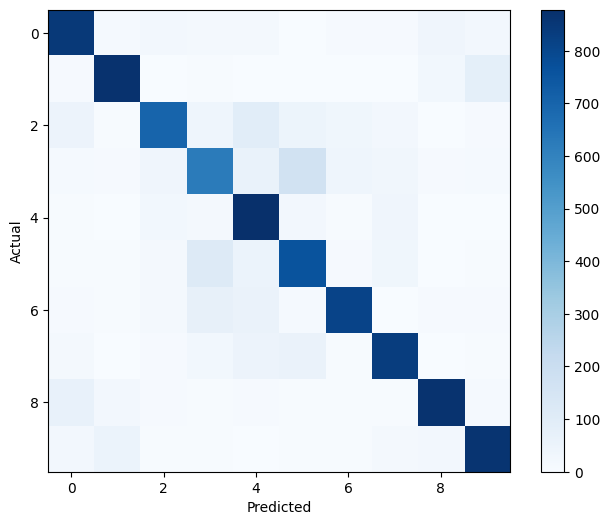

In [ ]:
evaluate_model(model, testloader)

# Exercise 7: Image Captioning using RNN
# Objective: Generate text captions for CIFAR-10 images using an RNN-
# based model.
# 1. Prepare CIFAR-10 dataset by assigning simple text descriptions to
# images (e.g., &quot;A red car&quot; for a car image).
# 2. Use CNN (e.g., ResNet-15) as an encoder to extract image features.
# 3. Use RNN (e.g., GRU or vanilla RNN) as a decoder to generate
# captions from image features.
# 4. Train the model using a sequence loss function.
# 5. Evaluate performance using BLEU score or METEOR score.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, Embedding, GRU, Attention, Concatenate, Lambda
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import nltk
from nltk.translate.bleu_score import sentence_bleu


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, GRU, Attention, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score

In [ ]:
import tensorflow as tf
import numpy as np

#  dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# CIFAR-10 class labels
class_labels = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# generate simple captions
def generate_captions(y_labels):
    return [f"A picture of a {class_labels[label[0]]}" for label in y_labels]

# captions assign
train_captions = generate_captions(y_train)
test_captions = generate_captions(y_test)


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input

# ResNet50 (pretrained on ImageNet, remove fully connected layers)
base_model = ResNet50(weights="imagenet", include_top=False,input_shape=(32, 32, 3))
x = Flatten()(base_model.output)
encoded_features = Dense(256, activation="relu")(x)

# Define encoder model
encoder = Model(inputs=base_model.input, outputs=encoded_features)
encoder.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,112,256 (91.98 MB)

 Trainable params: 24,059,136 (91.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Types of RNNs

# 1.Vanilla RNN -Basic RNN with simple recurrence.
# 2.Long Short-Term Memory (LSTM) -Overcomes vanishing gradient problem using special gates.
# 3.Gated Recurrent Unit (GRU) -A simpler alternative to LSTM with similar performance.

#Embedding :dense vectors in a lower-dimensional space

In [ ]:
from tensorflow.keras.layers import GRU, Embedding, LSTM

vocab_size = 20  # simple vocabulary size for this example
embedding_dim = 50
max_caption_length = 5  # keep captions short

# decoder
image_input = Input(shape=(256,))
text_input = Input(shape=(max_caption_length,))

# Embedding
embedding_layer = Embedding(vocab_size, embedding_dim)(text_input)

#  Decoder
gru_layer = GRU(128, return_sequences=True)(embedding_layer)
output_layer = Dense(vocab_size, activation="softmax")(gru_layer)

decoder = Model(inputs=[image_input, text_input], outputs=output_layer)
decoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 5, 50)          │          1,000 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru (GRU)                 │ (None, 5, 128)         │         69,120 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 256)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 5, 20)          │          2,580 │ gru[0][0]              │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 72,700 (283.98 KB)

 Trainable params: 72,700 (283.98 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
decoder.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
# Encode the image data first using the encoder model
encoded_images = encoder.predict(x_train[:1000])
# Now use the encoded features as input to the decoder
# Change target data shape to (batch_size, sequence_length)
decoder.fit([encoded_images, np.zeros((1000, max_caption_length))],
            np.random.randint(0, vocab_size, (1000, max_caption_length)), epochs=5)

32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.9956
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9946
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9928
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9927
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9932


In [ ]:
!pip install nltk

import nltk
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download("wordnet")
nltk.download('punkt_tab')

In [ ]:
# create and fit tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>") #i
tokenizer.fit_on_texts(train_captions + test_captions) # fit testing captions



def generate_caption(decoder, encoded_image, tokenizer, max_caption_length):
    caption = ["<start>"]  # start token (if used)

    for _ in range(max_caption_length):
        # convert current caption to sequence
        sequence = tokenizer.texts_to_sequences([caption])[0]
        sequence = pad_sequences([sequence], maxlen=max_caption_length, padding="post")

        # predict next word
        predicted_id = np.argmax(decoder.predict([encoded_image, sequence]), axis=-1)[0, -1]

        # convert to word
        word = tokenizer.index_word.get(predicted_id, "<end>")
        if word == "<end>":  # stop if end token is reached
            break

        caption.append(word)

    return " ".join(caption[1:])  # remove <start> token before returning

# function to evaluate model predictions
def evaluate_model(decoder, encoder, x_test, test_captions, tokenizer, max_caption_length):
    bleu_scores = []
    meteor_scores = []

    for i in range(100):  #frist 100 images
        image = x_test[i:i+1]  # single image
        encoded_image = encoder.predict(image)  # features


        generated_caption = generate_caption(decoder, encoded_image, tokenizer, max_caption_length)

        # reference captionliketrue label
        reference_caption = nltk.word_tokenize(test_captions[i])  # tokenized reference
        generated_caption_tokens = nltk.word_tokenize(generated_caption)  # tokenized generated caption

        # Compute BLEU score
        bleu = sentence_bleu([reference_caption], generated_caption_tokens)
        bleu_scores.append(bleu)

        # Compute METEOR score
        meteor = meteor_score([reference_caption], generated_caption_tokens)
        meteor_scores.append(meteor)

        print(f"Image {i+1}:")
        print(f"Generated: {generated_caption}")
        print(f"Reference: {test_captions[i]}")
        print(f"BLEU Score: {bleu:.4f}, METEOR Score: {meteor:.4f}\n")

    # Average scores
    print(f"Average BLEU Score: {np.mean(bleu_scores):.4f}")
    print(f"Average METEOR Score: {np.mean(meteor_scores):.4f}")

# Call evaluation function after training
evaluate_model(decoder, encoder, x_test, test_captions, tokenizer, max_caption_length)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image 1:
Generated: 
Reference: A picture of a cat
BLEU Score: 0.0000, METEOR Score: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Image 2:
Generated: 
Reference: A picture of a ship
BLEU Score: 0.0000, METEOR Score: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image 3:
Generated: 
Reference: A picture of a ship
BLEU Score: 0.0000, METEOR Score: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image 4:
Generated: 
Reference: A picture of a airplane
BLEU Score: 0.0000, METEOR Score: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image 5:
Generated: 
Reference: A picture of a frog
BLEU Score: 0.0000, METEOR Score: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image 6:
Generated: 
Reference: A picture of a frog
BLEU Score: 0.0000,

In [ ]:
BLEU Score Interpretation: The BLEU score ranges from 0 to 1, with higher scores indicating better caption quality. However, it's important to note that the BLEU score has limitations and might not always perfectly correlate with human judgments of caption quality.

In [ ]:
# LAB 8
#Load CIFAR-10 and Extract Brightness



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


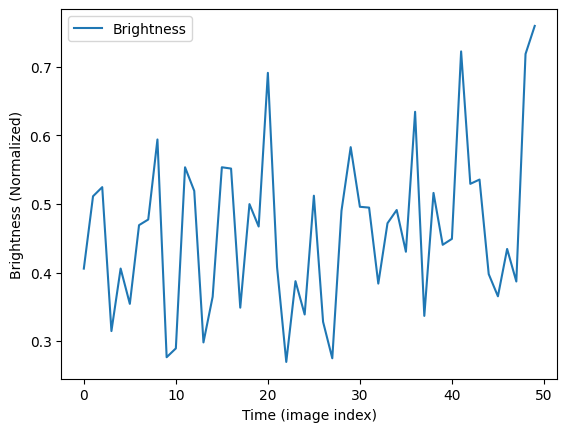

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

# Convert images to grayscale brightness values (average of RGB channels)
train_brightness = np.mean(x_train, axis=(1, 2, 3))  # Mean across H, W, C
test_brightness = np.mean(x_test, axis=(1, 2, 3))

# Normalize brightness values
train_brightness = train_brightness / 255.0
test_brightness = test_brightness / 255.0

# Plot brightness trend for first 50 images
plt.plot(train_brightness[:50], label="Brightness")
plt.xlabel("Time (image index)")
plt.ylabel("Brightness (Normalized)")
plt.legend()
plt.show()


In [ ]:
# Step 2: Prepare Data for LSTM

# LSTMs require sequential input-output pairs.
# We split the brightness values into overlapping sequences.

In [ ]:
# Function to create time-series sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # past brightness values
        y.append(data[i+seq_length])    # next predicted value
    return np.array(X), np.array(y)

seq_length = 10  # Use last 10 brightness values to predict the next one

# Create sequences for training and testing
X_train, y_train = create_sequences(train_brightness, seq_length)
X_test, y_test = create_sequences(test_brightness, seq_length)

# Reshape for LSTM: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], seq_length, 1))
X_test = X_test.reshape((X_test.shape[0], seq_length, 1))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (49990, 10, 1)
y_train shape: (49990,)


In [ ]:
# Step 3: Build LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define LSTM model
model = Sequential([
    LSTM(50, activation="relu", return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation="relu"),
    Dense(1)  # Predict next brightness value
])

# Compile model
model.compile(optimizer="adam", loss="mse")

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0286 - val_loss: 0.0164
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0157 - val_loss: 0.0156
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0160 - val_loss: 0.0159
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0160 - val_loss: 0.0157
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0159 - val_loss: 0.0157
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0157 - val_loss: 0.0156
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0158 - val_loss: 0.0157
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0161 - val_loss: 0.0157
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0156 - val_loss: 0.0156
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0156 - val_loss: 0.0156


In [ ]:
# Step 4: test on Unseen Data

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


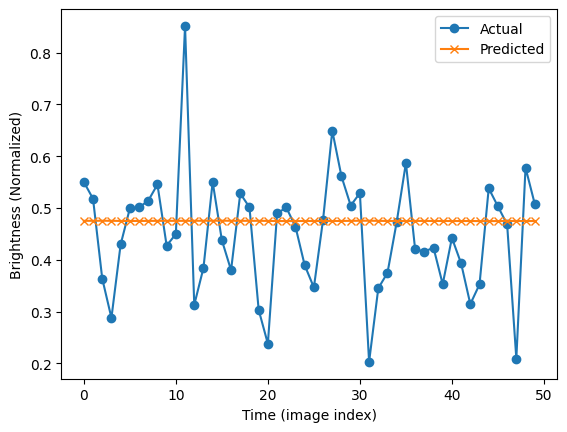

In [ ]:
# predict part
predictions = model.predict(X_test)

# ploting actual vs predicted brightness values
plt.plot(y_test[:50], label="Actual", marker="o")
plt.plot(predictions[:50], label="Predicted", marker="x")
plt.xlabel("Time (image index)")
plt.ylabel("Brightness (Normalized)")
plt.legend()
plt.show()
